# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset to DataFrame
df = pd.read_csv("C:/Users/besta/Documents/Github/Diabetes-Monitoring/dataset/diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
# Dataframe Convert from float64 to int64
df = df.astype("int64")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [5]:
df.sample(15)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
234113,0,1,0,1,23,1,0,0,0,1,...,1,0,2,0,0,0,0,10,6,7
39269,0,0,0,1,27,0,0,0,1,1,...,0,0,2,0,0,0,0,9,4,6
33196,0,0,0,1,23,0,0,0,1,1,...,1,0,2,0,0,0,0,6,6,7
60613,0,0,0,1,28,1,0,0,1,1,...,1,0,2,0,0,0,1,7,6,8
208920,0,0,1,1,23,1,0,0,1,1,...,1,0,1,0,0,0,1,10,6,7
216893,0,1,1,1,28,1,0,0,1,1,...,1,0,4,0,0,1,0,12,5,3
169123,0,1,0,1,28,1,0,0,1,1,...,1,0,3,0,4,0,0,9,5,8
194427,0,1,1,1,27,0,0,0,1,1,...,1,0,4,0,2,0,0,12,4,3
118257,0,1,1,1,35,1,0,0,1,1,...,1,0,2,0,0,0,0,9,6,7
82111,0,0,0,1,33,0,0,0,1,1,...,1,0,2,0,0,0,0,3,5,7


# Analysis

In [6]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
df.Diabetes_012.value_counts()

0    213703
2     35346
1      4631
Name: Diabetes_012, dtype: int64

C:\Users\besta\scoop\apps\python\current\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\besta\scoop\apps\python\current\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\besta\scoop\apps\python\current\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

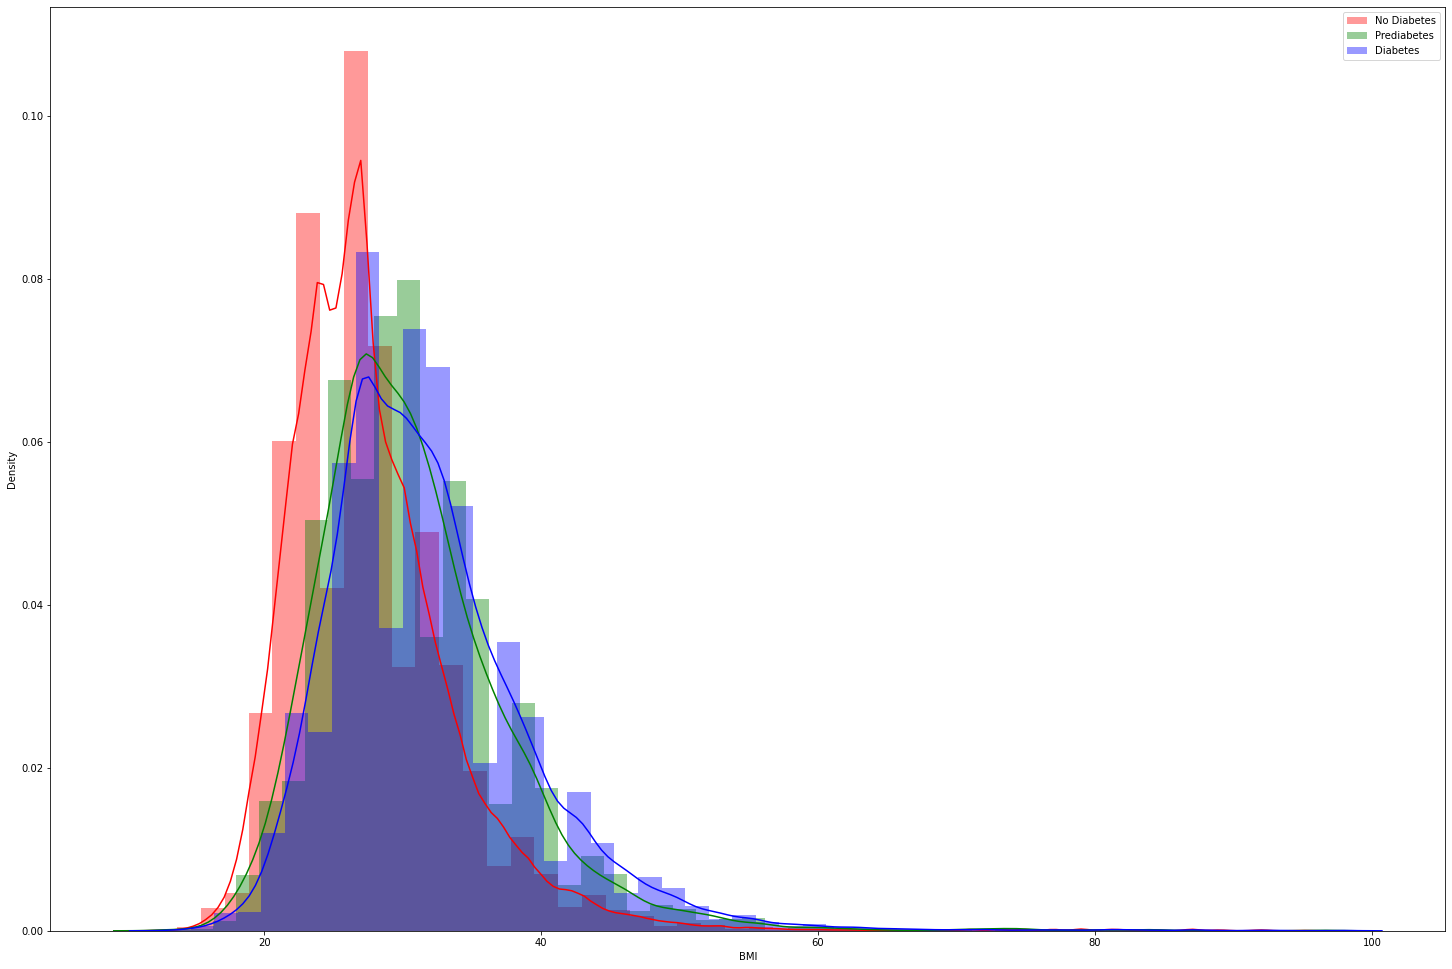

In [12]:
plt.figure(figsize=(25, 17))
sns.distplot(df.BMI[df.Diabetes_012 == 0], color="r", label="No Diabetes")
sns.distplot(df.BMI[df.Diabetes_012 == 1], color="g", label="Prediabetes")
sns.distplot(df.BMI[df.Diabetes_012 == 2], color="b", label="Diabetes")
plt.legend()

C:\Users\besta\scoop\apps\python\current\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\besta\scoop\apps\python\current\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\besta\scoop\apps\python\current\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

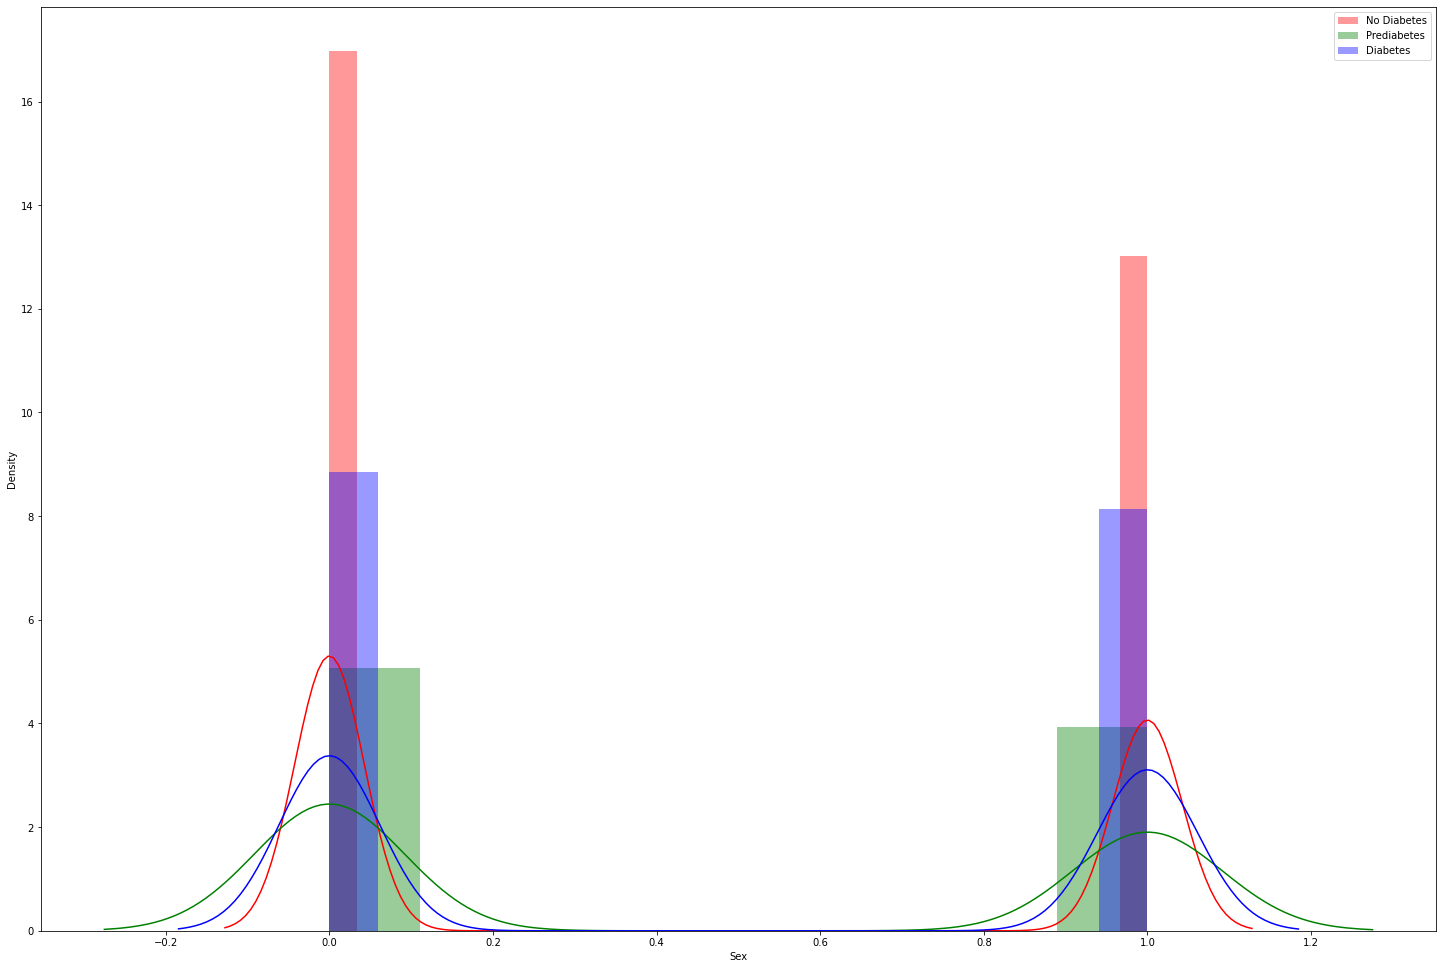

In [13]:
plt.figure(figsize=(25, 17))
sns.distplot(df.Sex[df.Diabetes_012 == 0], color="r", label="No Diabetes")
sns.distplot(df.Sex[df.Diabetes_012 == 1], color="g", label="Prediabetes")
sns.distplot(df.Sex[df.Diabetes_012 == 2], color="b", label="Diabetes")
plt.legend()

C:\Users\besta\scoop\apps\python\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\besta\scoop\apps\python\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\besta\scoop\apps\python\current\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


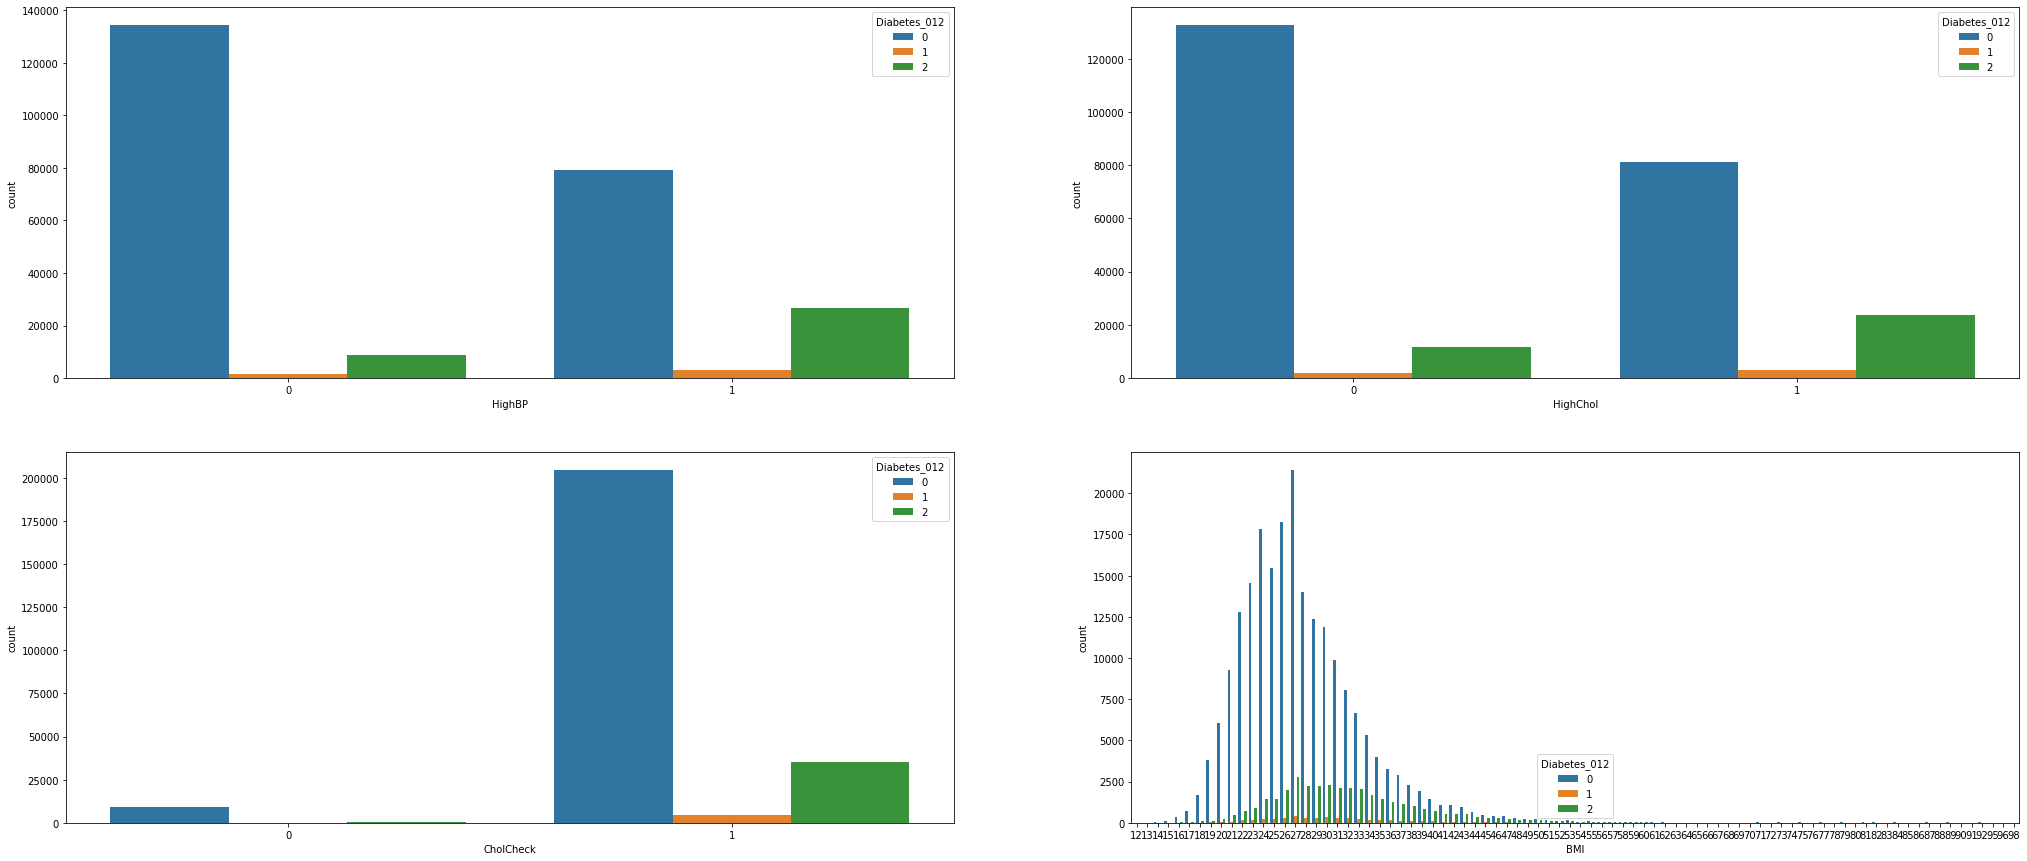

In [14]:
cat_var = ["HighBP",
           "HighChol",
           "CholCheck",
           "BMI"]

fig, axes = plt.subplots(2, 2, figsize=(35,15))
for cat, ax in zip (cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue="Diabetes_012", ax=ax)